In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [48]:
"""
Here we model the Minimal Bergman Model 1979.
dG = m(meal) - a*G(glucose)
   = m - s(insulin sensitivity)*I(insulin)*G
   
dI = q(con. of insulin a beta cell can secrete)*B(beta cell amount)*G - gamma(removal rate of insulin 1/30min)*I

Solution is y(t) which is a vector [G(t), I(t)], which tells us what is the state of G and I at each time point.

"""

# In order to run a simulateion, we need to define this ODE by defining a function.
# Input of this ODE is the state of G and I at a single time point (y), this ODE is to compute how they change - dy.

def miniGlu(y, t):
    # define the simulation parameters within the function
    if 1<=t<=2:
        m = 2
    else:
        m = 1
    s = 1
    q = 1
    B = 1
    r = 1
    
    [G, I] = y
    dy = np.empty(2)
    
    dy[0] = m - s*I*G
    dy[1] = q*B*G**2 - r*I
    
    return dy


    

In [49]:
# In order to run the simulation, we need to use ODE solver where the 1st argument is the ODE function;
# the 2nd argument is the initial condition. (here we use the steady state as the initial state)
# the 3rd argument is the timeframe of the simulation

t0 = 0
tmax = 10
dt = 0.01
time = np.arange(t0, tmax, dt)
solus = odeint(miniGlu, [1,1], time)

Text(0.5, 1.0, 'Minimal Bergman Model')

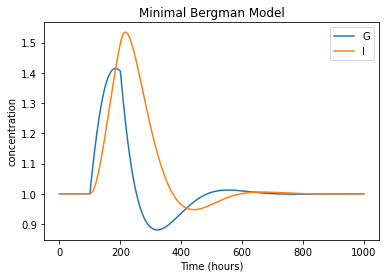

In [50]:
# finally create a DataFrame of the solutio to plot it nice and easily. 
df = pd.DataFrame(solus, columns = ['G','I'])
df.plot()
plt.xlabel('Time (hours)')
plt.ylabel('concentration')
plt.title('Minimal Bergman Model')

In [51]:
# change value of the sensitivity s to 1/10 (0.1)
def miniGlu(y, t):
    # define the simulation parameters within the function
    if 1<=t<=2:
        m = 2
    else:
        m = 1
    s = 0.1
    q = 1
    B = 1
    r = 1
    
    [G, I] = y
    dy = np.empty(2)
    
    dy[0] = m - s*I*G
    dy[1] = q*B*G**2 - r*I
    
    return dy


In [52]:
t0 = 0
tmax = 10
dt = 0.01
time = np.arange(t0, tmax, dt)
solus = odeint(miniGlu, [1,1], time)

Text(0.5, 1.0, 'Minimal Bergman Model')

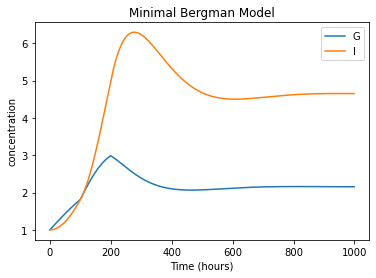

In [53]:
df = pd.DataFrame(solus, columns = ['G','I'])
df.plot()
plt.xlabel('Time (hours)')
plt.ylabel('concentration')
plt.title('Minimal Bergman Model')